# Importing libraries and loading data

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

In [2]:
life_df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
life_df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

The dataset contains over 2938 rows and 22 columns. The dataset contains numerical and categorical columns. The objective is to create a model to predict the value in the column Life expectancy.

# Analyzing the dataset

In [4]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The dataset contains some missing values that later should be filled. The rows where the target variable is missing will be deleted in order to avoid training on incomplete data.

In [5]:
life_df.dropna(subset=['Life expectancy '], inplace=True)

In [6]:
life_df["Life expectancy "].isna().any()

False

In [7]:
life_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2928.00000       2928.000000      2928.000000    2928.000000   
mean   2007.50000         69.224932       164.796448      30.407445   
std       4.61056          9.523867       124.292079     118.114450   
min    2000.00000         36.300000         1.000000       0.000000   
25%    2003.75000         63.100000        74.000000       0.000000   
50%    2007.50000         72.100000       144.000000       3.000000   
75%    2011.25000         75.700000       228.000000      22.000000   
max    2015.00000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2735.000000             2928.000000  2375.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       4.050749             1990.930605    25.018337   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.905000                4.853964    77.000000       0.000000   
50%       3.770000               65.611455    92.000000      17.000000   
75%       7.715000              442.614322    97.000000     362.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2896.000000         2928.000000  2909.000000        2702.000000   
mean     38.235394           42.179303    82.548298           5.930163   
std      19.959590          160.700547    23.416674           2.483273   
min       1.000000            0.000000     3.000000           0.370000   
25%      19.300000            0.000000    78.000000           4.260000   
50%      43.350000            4.000000    93.000000           5.750000   
75%      56.100000           28.000000    97.000000           7.490000   
max      77.600000         2500.000000    99.000000          17.600000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2909.000000  2928.000000    2485.000000  2.284000e+03   
mean     82.321416     1.747712    7494.210719  1.276454e+07   
std      23.706644     5.085542   14282.251492  6.103765e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.852618  1.966738e+05   
50%      93.000000     0.100000    1764.973870  1.391756e+06   
75%      97.000000     0.800000    5932.899677  7.426746e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2896.000000          2896.000000   
mean                4.850622             4.881423   
std                 4.420829             4.509609   
min                 0.100000             0.100000   
25%                 1.600000             1.575000   
50%                 3.300000             3.400000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2768.000000  2768.000000  
mean                          0.627419    11.999639  
std                           0.210978     3.346440  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779250    14.300000  
max                           0.948000    20.700000

Visualising target variable.

In [8]:
fig_target = px.histogram(life_df, x='Life expectancy ', marginal='box', nbins=40, title='Distribution of life expectancy')
fig_target.update_layout(bargap=0.1)
fig_target.show()

Identifying numerical and categorical columns.

In [9]:
input_cols = [col for col in life_df.columns if col not in ["Life expectancy "]]
target_col = 'Life expectancy '

In [10]:
numeric_cols = life_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = life_df[input_cols].select_dtypes('object').columns.tolist()
print("Numerical columns: ")
for x in numeric_cols:
    print("  ", x)
print("Categorical columns: ")
for y in categorical_cols:
    print("  ", y)

Numerical columns: 
   Year
   Adult Mortality
   infant deaths
   Alcohol
   percentage expenditure
   Hepatitis B
   Measles 
    BMI 
   under-five deaths 
   Polio
   Total expenditure
   Diphtheria 
    HIV/AIDS
   GDP
   Population
    thinness  1-19 years
    thinness 5-9 years
   Income composition of resources
   Schooling
Categorical columns: 
   Country
   Status


Visualising categorical variables.

In [11]:
avg_life = life_df.groupby("Country")["Life expectancy "].mean().reset_index()

fig = px.choropleth(
    avg_life,
    locations="Country",
    locationmode="country names",
    color="Life expectancy ",
    color_continuous_scale="Viridis",
    title="Average Life Expectancy by Country"
)
fig.show()

In [12]:
life_df_sorted = life_df.sort_values("Year")

fig = px.choropleth(
    life_df_sorted,
    locations="Country",
    locationmode="country names",
    color="Life expectancy ",
    animation_frame="Year",
    color_continuous_scale="Viridis",
    title="Life Expectancy by Country Over Time",
    range_color=[life_df["Life expectancy "].min(), life_df["Life expectancy "].max()]
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Life Expectancy")
)

fig.show()

<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

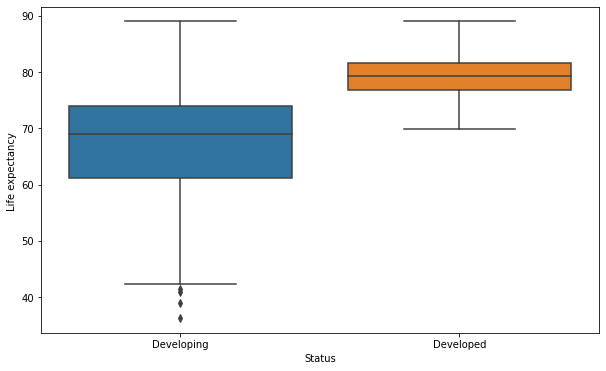

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = "Status", y = "Life expectancy ", data = life_df)

<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

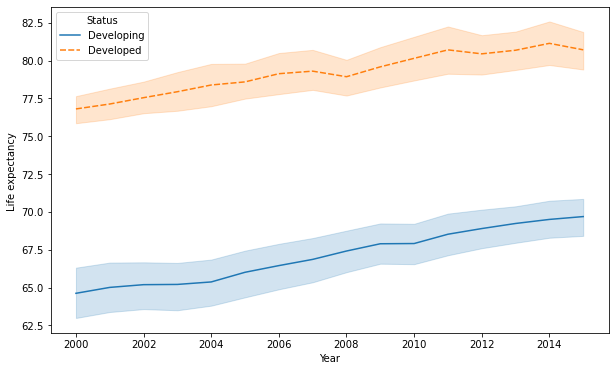

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=life_df, x='Year', y='Life expectancy ', hue='Status', style='Status')

In [15]:
life_df[categorical_cols].nunique()

Country    183
Status       2
dtype: int64

Visualising numerical variables.

In [16]:
def create_scatterplot(column_name):
    plt.figure(figsize=(12, 50))
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1), 2, index*2 + 1) 
        sns.histplot(data = life_df, x = col, kde = True)
        plt.xlabel(col) 
        plt.subplot((len(column_name) + 1), 2, index*2 + 2) 
        sns.scatterplot(x = 'Life expectancy ', y = col, data = life_df)
        plt.xlabel("Life expectancy") 
        plt.ylabel(col) 
    plt.tight_layout(pad = 2)
    plt.show()

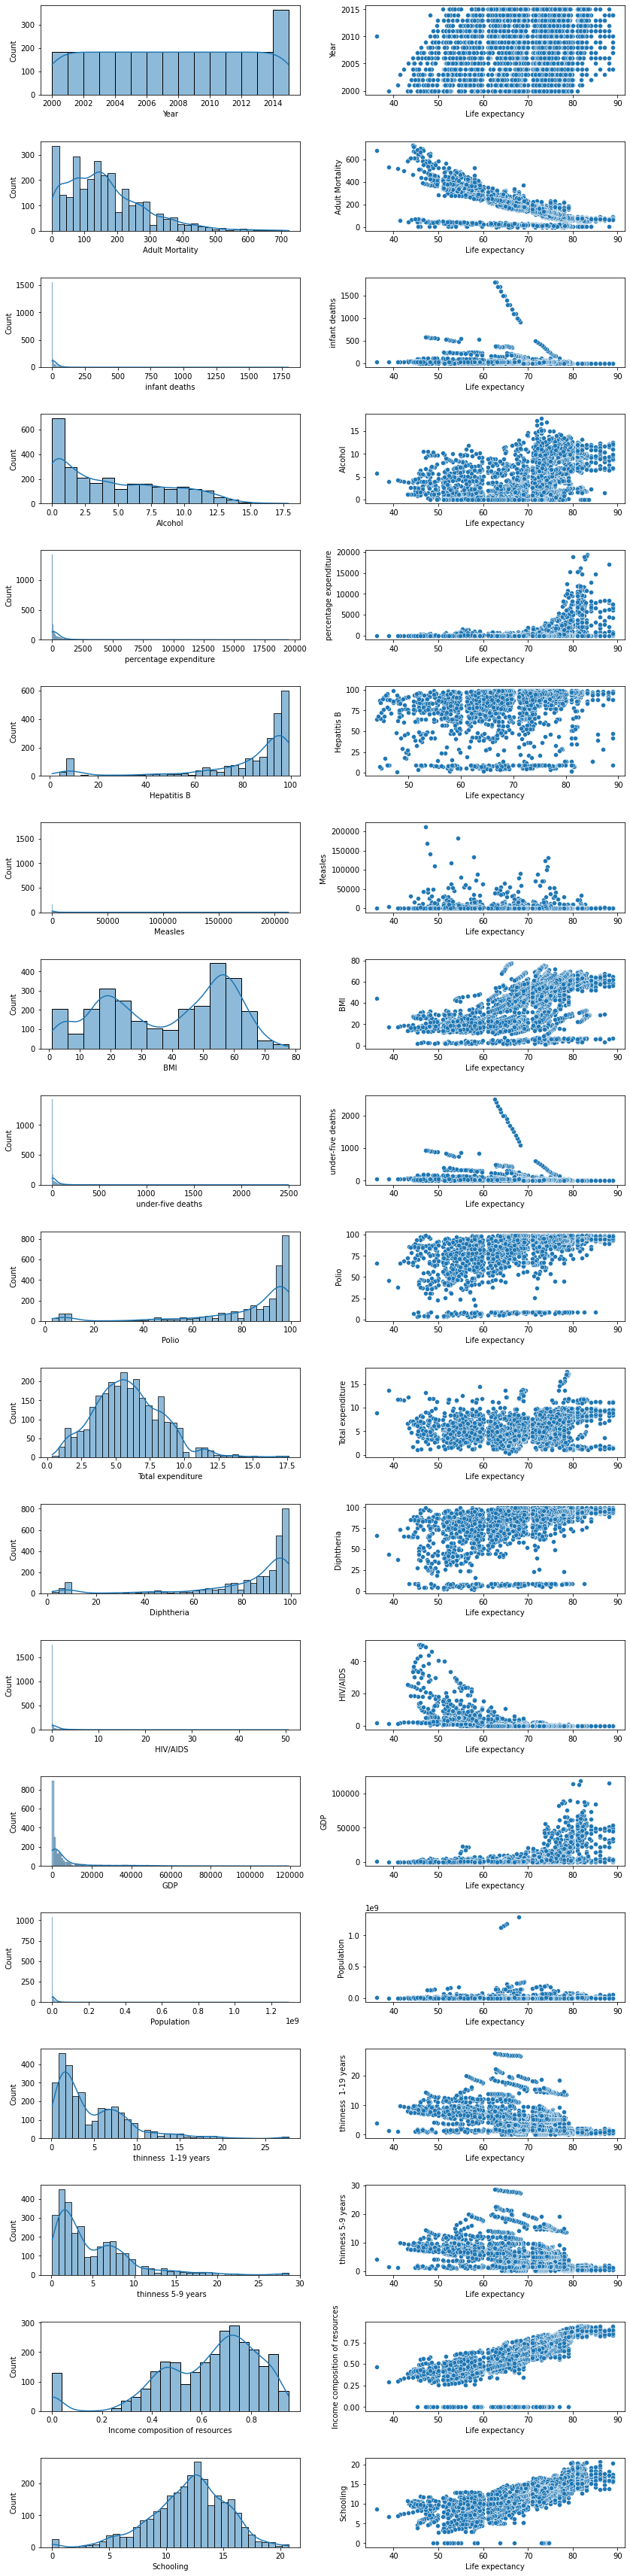

In [17]:
create_scatterplot(numeric_cols) 

In [18]:
life_df[numeric_cols].describe()

Year  Adult Mortality  infant deaths      Alcohol  \
count  2928.00000      2928.000000    2928.000000  2735.000000   
mean   2007.50000       164.796448      30.407445     4.614856   
std       4.61056       124.292079     118.114450     4.050749   
min    2000.00000         1.000000       0.000000     0.010000   
25%    2003.75000        74.000000       0.000000     0.905000   
50%    2007.50000       144.000000       3.000000     3.770000   
75%    2011.25000       228.000000      22.000000     7.715000   
max    2015.00000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2928.000000  2375.000000    2928.000000  2896.000000   
mean               740.321185    80.960842    2427.855874    38.235394   
std               1990.930605    25.018337   11485.970937    19.959590   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.853964    77.000000       0.000000    19.300000   
50%                 65.611455    92.000000      17.000000    43.350000   
75%                442.614322    97.000000     362.250000    56.100000   
max              19479.911610    99.000000  212183.000000    77.600000   

       under-five deaths         Polio  Total expenditure  Diphtheria   \
count         2928.000000  2909.000000        2702.000000  2909.000000   
mean            42.179303    82.548298           5.930163    82.321416   
std            160.700547    23.416674           2.483273    23.706644   
min              0.000000     3.000000           0.370000     2.000000   
25%              0.000000    78.000000           4.260000    78.000000   
50%              4.000000    93.000000           5.750000    93.000000   
75%             28.000000    97.000000           7.490000    97.000000   
max           2500.000000    99.000000          17.600000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  2928.000000    2485.000000  2.284000e+03            2896.000000   
mean      1.747712    7494.210719  1.276454e+07               4.850622   
std       5.085542   14282.251492  6.103765e+07               4.420829   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     463.852618  1.966738e+05               1.600000   
50%       0.100000    1764.973870  1.391756e+06               3.300000   
75%       0.800000    5932.899677  7.426746e+06               7.200000   
max      50.600000  119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  
count          2896.000000                      2768.000000  2768.000000  
mean              4.881423                         0.627419    11.999639  
std               4.509609                         0.210978     3.346440  
min               0.100000                         0.000000     0.000000  
25%               1.575000                         0.493000    10.100000  
50%               3.400000                         0.677000    12.300000  
75%               7.200000                         0.779250    14.300000  
max              28.600000                         0.948000    20.700000

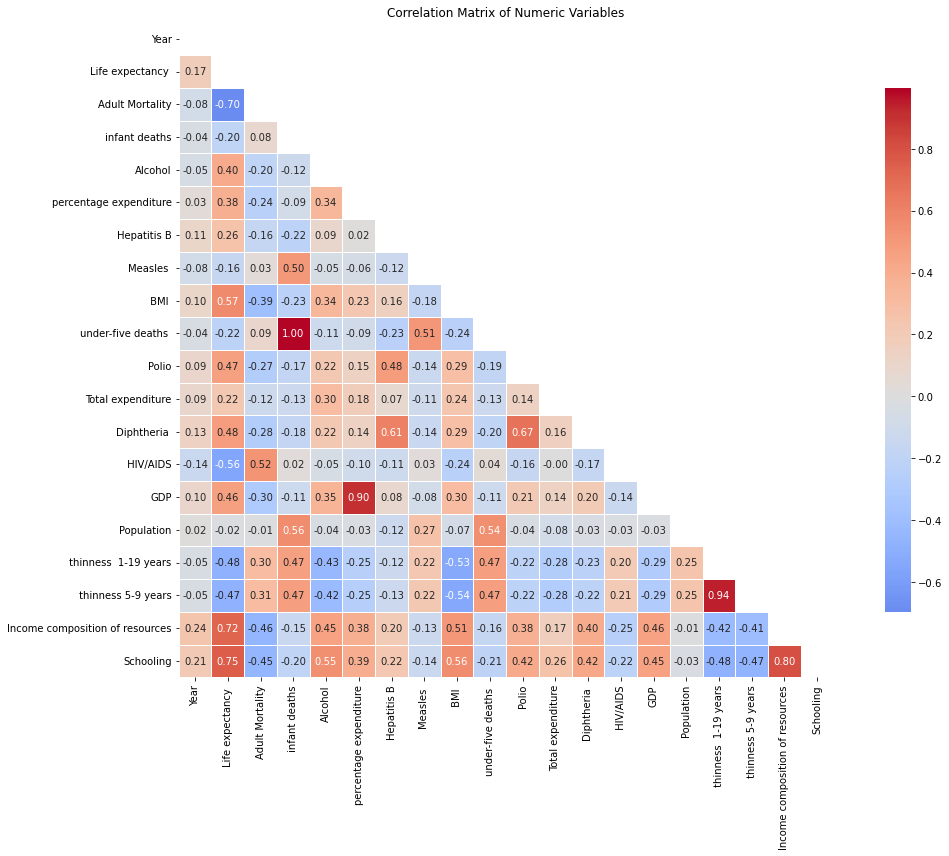

Correlations with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
Adult Mortality                    0.696359
 BMI                               0.567694
 HIV/AIDS                          0.556556
Diphtheria                         0.479495
 thinness  1-19 years              0.477183
 thinness 5-9 years                0.471584
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
under-five deaths                  0.222529
Total expenditure                  0.218086
infant deaths                      0.196557
Year                               0.170033
Measles                            0.157586
Population                         0.021538
Name: Life expectancy , dtype: float64


In [19]:
numeric_only = life_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = life_df[numeric_only].corr()
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()
life_exp_corr = correlation_matrix['Life expectancy '].abs().sort_values(ascending=False)
print("Correlations with Life Expectancy:")
print(life_exp_corr)

# Separating the training, validation and test sets

The training, validation and test sets will be separated over time, so that the model is trained on data from the past and evaluated on data from the future. (60-20-20%)

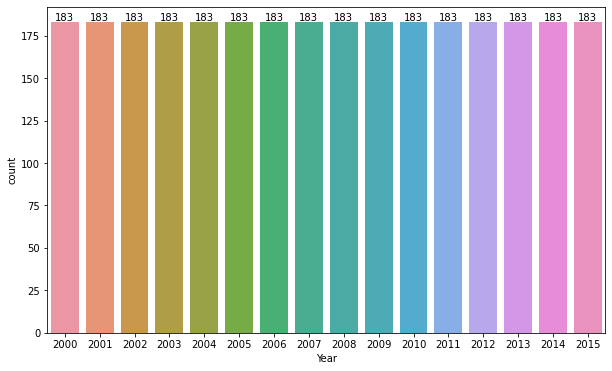

In [20]:
plt.figure(figsize=(10, 6))
year_graph = sns.countplot(x=life_df.Year)
for container in year_graph.containers:
    year_graph.bar_label(container)

In [21]:
train_df = life_df[life_df.Year < 2010]
val_df = life_df[(life_df.Year >= 2010) & (life_df.Year <= 2012)]
test_df = life_df[life_df.Year > 2012]

In [22]:
print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (1830, 22)
val_df.shape:  (549, 22)
test_df.shape:  (549, 22)


Dropping redundant features.

In [23]:
input_cols_mod = [col for col in input_cols if col not in ["infant deaths", " thinness 5-9 years", "percentage expenditure"]]
#print(input_cols_mod)
numeric_cols_mod = [col for col in numeric_cols if col not in ["infant deaths", " thinness 5-9 years", "percentage expenditure"]]
#print(numeric_cols_mod)

Creating inputs and targets for the training, validation and test sets.

In [24]:
train_inputs = train_df[input_cols_mod].copy()
train_targets = train_df[target_col].copy()

In [25]:
#train_inputs

In [26]:
#train_targets

In [27]:
val_inputs = val_df[input_cols_mod].copy()
val_targets = val_df[target_col].copy()

In [28]:
test_inputs = test_df[input_cols_mod].copy()
test_targets = test_df[target_col].copy()

# Preprocessing data

Imputing missing numerical data

In [29]:
imputer = SimpleImputer(strategy = 'mean')

In [30]:
life_df[numeric_cols_mod].isna().sum()

Year                                 0
Adult Mortality                      0
Alcohol                            193
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
Income composition of resources    160
Schooling                          160
dtype: int64

Number of missing values in the numerical columns.

In [31]:
imputer.fit(life_df[numeric_cols_mod])

SimpleImputer()

In [32]:
#list(imputer.statistics_)

The missing values in the dataset can now be filled.

In [33]:
train_inputs[numeric_cols_mod] = imputer.transform(train_inputs[numeric_cols_mod])
val_inputs[numeric_cols_mod] = imputer.transform(val_inputs[numeric_cols_mod])
test_inputs[numeric_cols_mod] = imputer.transform(test_inputs[numeric_cols_mod])

In [34]:
train_inputs[numeric_cols_mod].isna().sum()

Year                               0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [35]:
#train_inputs[numeric_cols_mod].describe()

Scaling numeric features

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(life_df[numeric_cols_mod])

StandardScaler()

In [38]:
list(scaler.mean_)

[2007.5,
 164.79644808743168,
 4.614855575868373,
 80.96084210526315,
 2427.85587431694,
 38.235393646408845,
 42.17930327868852,
 82.54829838432451,
 5.9301628423390085,
 82.3214162942592,
 1.7477117486338798,
 7494.210719388651,
 12764541.774711035,
 4.850621546961325,
 0.6274187138728323,
 11.9996387283237]

In [39]:
list(scaler.scale_)

[4.6097722286464435,
 124.27085245062368,
 4.050008649547379,
 25.01306907506587,
 11484.009366960216,
 19.956143750603882,
 160.67310267778095,
 23.41264832904749,
 2.4828133388615687,
 23.70256911523267,
 5.084673902850793,
 14279.377510311815,
 61024283.69492818,
 4.4200657979127715,
 0.21093994648388278,
 3.3458357582980516]

Scaling the dataset.

In [40]:
train_inputs[numeric_cols_mod] = scaler.transform(train_inputs[numeric_cols_mod])
val_inputs[numeric_cols_mod] = scaler.transform(val_inputs[numeric_cols_mod])
test_inputs[numeric_cols_mod] = scaler.transform(test_inputs[numeric_cols_mod])

In [41]:
train_inputs[numeric_cols_mod].describe()

Year  Adult Mortality      Alcohol  Hepatitis B     Measles   \
count  1830.000000      1830.000000  1830.000000  1830.000000  1830.000000   
mean     -0.650791         0.057351     0.043124    -0.040290     0.040158   
std       0.623256         1.066003     0.985701     0.887160     1.123062   
min      -1.626978        -1.318060    -1.136999    -3.196763    -0.211412   
25%      -1.193118        -0.714540    -0.820950     0.000000    -0.211412   
50%      -0.650791        -0.143207    -0.159223     0.041545    -0.209844   
75%      -0.108465         0.556877     0.756824     0.561273    -0.171378   
max       0.325396         4.491830     3.272868     0.721189    18.264975   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1830.000000         1830.000000  1830.000000        1830.000000   
mean     -0.068105            0.026983    -0.041160          -0.048914   
std       0.963506            1.112225     1.006292           0.937414   
min      -1.865861           -0.262516    -3.397663          -2.239461   
25%      -0.998960           -0.262516    -0.279691          -0.672690   
50%       0.171106           -0.237621     0.403701          -0.092702   
75%       0.828798           -0.057130     0.617260           0.554749   
max       1.822226           15.297026     0.702684           4.458586   

       Diphtheria      HIV/AIDS          GDP   Population  \
count  1830.000000  1830.000000  1830.000000  1830.000000   
mean     -0.071294     0.099720    -0.048127    -0.004730   
std       1.044077     1.215272     0.843310     0.942216   
min      -3.346532    -0.324055    -0.524710    -0.209171   
25%      -0.266698    -0.324055    -0.493465    -0.202846   
50%       0.408335    -0.324055    -0.359991    -0.154542   
75%       0.619282    -0.107718     0.000000     0.000000   
max       0.703661     9.607752     7.479292    19.122170   

        thinness  1-19 years  Income composition of resources    Schooling  
count            1830.000000                      1830.000000  1830.000000  
mean                0.035120                        -0.138698    -0.124839  
std                 1.026327                         1.064870     1.018710  
min                -1.074785                        -2.974395    -3.586440  
25%                -0.735424                        -0.754569    -0.657426  
50%                -0.328190                         0.054903     0.000000  
75%                 0.599398                         0.595341     0.508202  
max                 5.169466                         1.462887     2.600355

Encoding categorical data. Since machine learning models can only be trained with numerical data, categorical data need to be converted to numbers.

In [42]:
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

In [43]:
life_df2 = life_df[categorical_cols].fillna('Unknown')

In [44]:
encoder.fit(life_df2)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
encoder.categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
        'Cyprus', 'Czechia', "Côte d'Ivoire",
        "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
        'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
        'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
        'Ghana', '

Generating column names for each individual category.

In [46]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
#print(encoded_cols)

In [47]:
train_inputs2 = train_inputs[categorical_cols].fillna('Unknown')
val_inputs2 = val_inputs[categorical_cols].fillna('Unknown')
test_inputs2 = test_inputs[categorical_cols].fillna('Unknown')

In [48]:
life_df[categorical_cols].isna().sum()

Country    0
Status     0
dtype: int64

In [49]:
# Encoding training data
encoded_array_train = encoder.transform(train_inputs2) 
encoded_df_train = pd.DataFrame(
    encoded_array_train,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train_inputs.index
)
train_inputs_clean = pd.concat([train_inputs.drop(columns=categorical_cols), encoded_df_train], axis=1)
# Encoding validation data
encoded_array_val = encoder.transform(val_inputs2) 
encoded_df_val = pd.DataFrame(
    encoded_array_val,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=val_inputs.index
)
val_inputs_clean = pd.concat([val_inputs.drop(columns=categorical_cols), encoded_df_val], axis=1)
# Encoding testing data
encoded_array_test = encoder.transform(test_inputs2) 
encoded_df_test = pd.DataFrame(
    encoded_array_test,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=test_inputs.index
)
test_inputs_clean = pd.concat([test_inputs.drop(columns=categorical_cols), encoded_df_test], axis=1)

In [50]:
test_inputs_clean

Year  Adult Mortality   Alcohol  Hepatitis B  Measles       BMI   \
0     1.626978         0.790238 -1.136999    -0.638100 -0.110924 -0.958872   
1     1.410048         0.854614 -1.136999    -0.758037 -0.168570 -0.983927   
2     1.193118         0.830473 -1.136999    -0.678079 -0.173968 -1.008982   
16    1.626978        -0.730634 -0.003668     0.721189 -0.211412  0.990402   
17    1.410048        -1.261731 -0.025890     0.681210 -0.211412  0.950314   
...        ...              ...       ...          ...       ...       ...   
2907  1.410048         1.200632 -1.136999     0.201461 -0.210628 -0.773466   
2908  1.193118         1.313289 -0.544408    -0.078393 -0.208364 -0.798521   
2922  1.626978         1.377665  0.000000     0.241440 -0.211412 -0.322477   
2923  1.410048         1.659307  0.465467     0.401357 -0.211412 -0.347532   
2924  1.193118         1.884622  0.438306     0.561273 -0.211412 -1.725553   

      under-five deaths      Polio  Total expenditure  Diphtheria   ...  \
0               0.254061 -3.269528           0.898109    -0.730782  ...   
1               0.272732 -1.048506           0.906164    -0.857351  ...   
2               0.291403 -0.877658           0.886026    -0.772972  ...   
16             -0.262516  0.702684           0.028128     0.703661  ...   
17             -0.256292  0.659972          -0.020204     0.661472  ...   
...                  ...       ...                ...          ...  ...   
2907           -0.007340 -0.194267          -0.378668     0.155198  ...   
2908           -0.001116 -0.365115          -0.378668    -0.140129  ...   
2922           -0.063354  0.232853           0.000000     0.197387  ...   
2923           -0.050906  0.403701           0.205347     0.366145  ...   
2924           -0.038459  0.531837           0.382565     0.534903  ...   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0                 0.0                 0.0              0.0   
1                 0.0                 0.0              0.0   
2                 0.0                 0.0              0.0   
16                0.0                 0.0              0.0   
17                0.0                 0.0              0.0   
...               ...                 ...              ...   
2907              0.0                 0.0              0.0   
2908              0.0                 0.0              0.0   
2922              0.0                 0.0              0.0   
2923              0.0                 0.0              0.0   
2924              0.0                 0.0              0.0   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                            0.0               0.0   
1                                            0.0               0.0   
2                                            0.0               0.0   
16                                           0.0               0.0   
17                                           0.0               0.0   
...                                          ...               ...   
2907                                         0.0               0.0   
2908                                         0.0               0.0   
2922                                         0.0               0.0   
2923                                         0.0               0.0   
2924                                         0.0               0.0   

      Country_Yemen  Country_Zambia  Country_Zimbabwe  Status_Developed  \
0               0.0             0.0               0.0               0.0   
1               0.0             0.0               0.0               0.0   
2               0.0             0.0               0.0               0.0   
16              0.0             0.0               0.0               0.0   
17              0.0             0.0               0.0               0.0   
...             ...             ...               ...               ...   
2907            0.0             1.0               0.0        

In [51]:
print('train_inputs: ', train_inputs_clean.shape)
print('train_targets: ', train_targets.shape)
print('val_inputs: ', val_inputs_clean.shape)
print('val_targets: ', val_targets.shape)
print('test_inputs: ', test_inputs_clean.shape)
print('test_targets: ', test_targets.shape)

train_inputs:  (1830, 201)
train_targets:  (1830,)
val_inputs:  (549, 201)
val_targets:  (549,)
test_inputs:  (549, 201)
test_targets:  (549,)


# Modeling

Making predictions and evaluating the models.

In [52]:
X_train = train_inputs_clean[numeric_cols_mod + encoded_cols]
X_val = val_inputs_clean[numeric_cols_mod + encoded_cols]
X_test = test_inputs_clean[numeric_cols_mod + encoded_cols]

In [53]:
def predict_function(inputs, targets, model, name):
    preds = model.predict(inputs)
    loss = rmse(targets, preds)
    print(name, "set:")
    print('\t'"RMSE loss: ", loss)
    r2 = r2_score(targets, preds)
    print('\t'"R² score:", r2)
    return preds

In [54]:
def plot(y_true, y_pred):
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Predicted Life Expectancy")
    plt.title("Predicted vs Actual Life Expectancy")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')  
    return 

In [55]:
def plot_res(y_true, y_pred):
    res = y_true-y_pred
    sns.scatterplot(x=y_true, y=res)
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Residual Life Expectancy")
    plt.title("Residual Life Expectancy")
    return 

In [56]:
def fit_function(model):
    fits = model.fit(train_inputs_clean[numeric_cols_mod + encoded_cols], train_targets)
    weight_df = pd.DataFrame({
        'feature' : numeric_cols_mod + encoded_cols,
        'weight' : model.coef_.tolist()
    })
    print(weight_df)
    print("Each weight is applied to the value in a specific column of the input.")
    print("Higher the weight, greater the impact for the prediction.")
    train_preds = predict_function(X_train, train_targets, model, 'Training')
    val_preds = predict_function(X_val, val_targets, model, name='Validation')
    test_preds = predict_function(X_test, test_targets, model, name='Test')
    fig, axes = plt.subplots(3, 2, figsize=(12, 14))
    row_titles = ["Training dataset", "Validation dataset", "Testing dataset"]
    for i, title in enumerate(row_titles):
        y_pos = 0.94 - i * 0.31  
        fig.text(0.5, y_pos, title, ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.subplot(3, 2, 1)
    plot(train_targets, train_preds)
    plt.subplot(3, 2, 2)
    plot_res(train_targets, train_preds)
    plt.subplot(3, 2, 3)
    plot(val_targets, val_preds)
    plt.subplot(3, 2, 4)
    plot_res(val_targets, val_preds)
    plt.subplot(3, 2, 5)
    plot(test_targets, test_preds)
    plt.subplot(3, 2, 6)
    plot_res(test_targets, test_preds)
    plt.tight_layout(rect=[0, 0, 1, 0.93]) 
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    return fits

Linear regression.

               feature     weight
0                 Year   1.310617
1      Adult Mortality   0.001495
2              Alcohol  -0.938123
3          Hepatitis B  -0.075006
4             Measles   -0.152931
..                 ...        ...
196      Country_Yemen  -4.876798
197     Country_Zambia -11.747798
198   Country_Zimbabwe -10.364728
199   Status_Developed   6.081411
200  Status_Developing  -6.081411

[201 rows x 2 columns]
Each weight is applied to the value in a specific column of the input.
Higher the weight, greater the impact for the prediction.
Training set:
	RMSE loss:  2.4430199849854075
	R² score: 0.9748552648250902
Validation set:
	RMSE loss:  6.19894509056474
	R² score: 0.922058378538957
Test set:
	RMSE loss:  7.207256969786461
	R² score: 0.8965498417488464


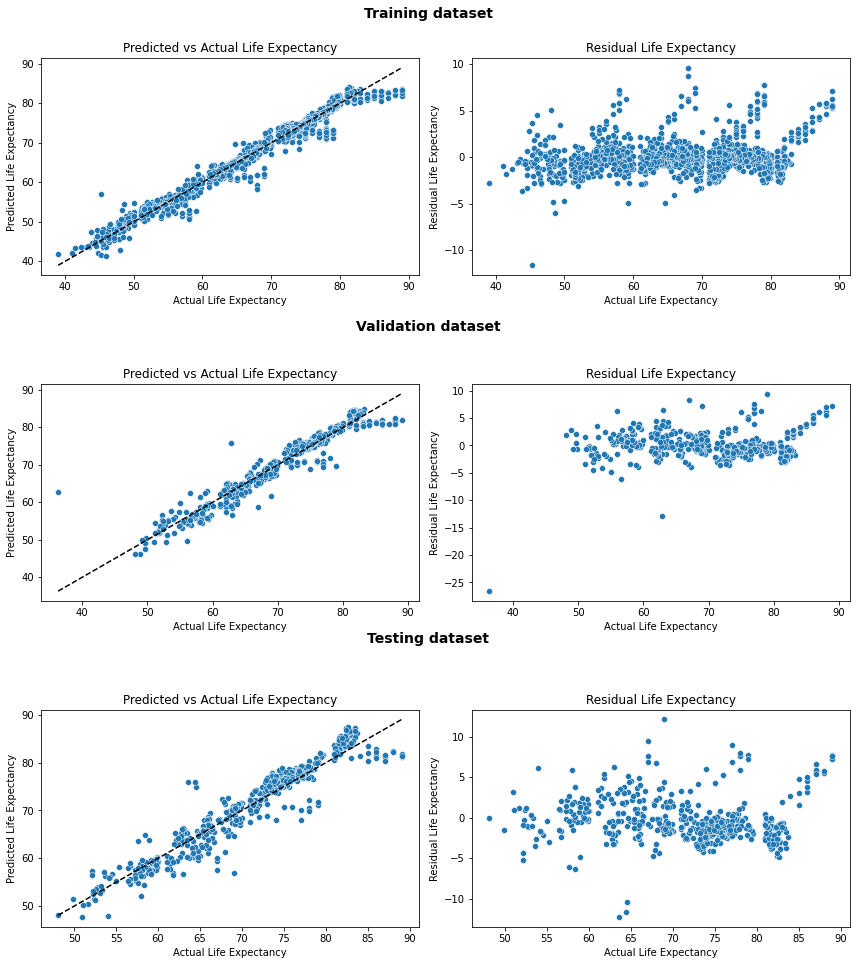

In [57]:
lin_reg_model = fit_function(LinearRegression())

Ridge regression

               feature     weight
0                 Year   1.085141
1      Adult Mortality  -0.059650
2              Alcohol  -0.658806
3          Hepatitis B  -0.073012
4             Measles   -0.158765
..                 ...        ...
196      Country_Yemen  -4.171522
197     Country_Zambia -10.239289
198   Country_Zimbabwe  -7.619475
199   Status_Developed   5.246694
200  Status_Developing  -5.246694

[201 rows x 2 columns]
Each weight is applied to the value in a specific column of the input.
Higher the weight, greater the impact for the prediction.
Training set:
	RMSE loss:  2.4893001528467704
	R² score: 0.9743789271070706
Validation set:
	RMSE loss:  6.247873722977236
	R² score: 0.9214431808092811
Test set:
	RMSE loss:  6.769910464449894
	R² score: 0.9028273430752626


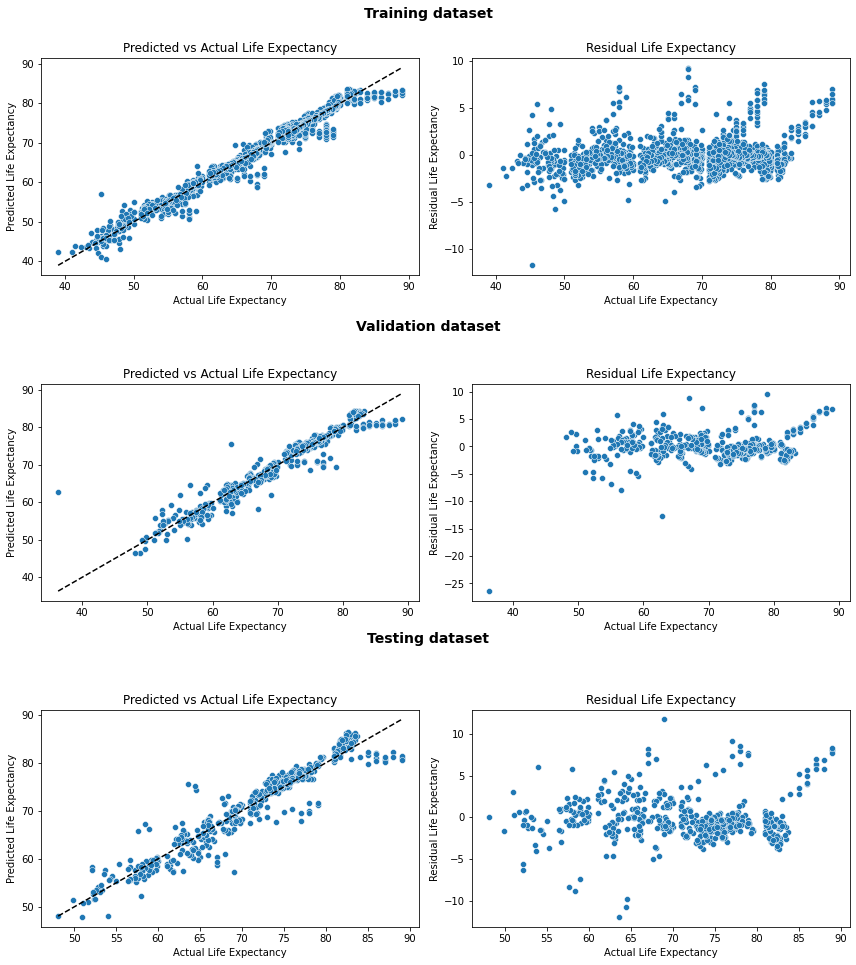

In [58]:
ridge_model = fit_function(Ridge(alpha=0.1))

In [59]:
def nonlinear_fit(model):
    fits = model.fit(train_inputs_clean[numeric_cols_mod + encoded_cols], train_targets)
    weight_df = pd.DataFrame({
        'feature' : numeric_cols_mod + encoded_cols,
        'importance' : model.feature_importances_.tolist()
    })
    print(weight_df)
    print("The feature importances: the higher, the more important the feature.")
    train_preds = predict_function(X_train, train_targets, model, 'Training')
    val_preds = predict_function(X_val, val_targets, model, name='Validation')
    test_preds = predict_function(X_test, test_targets, model, name='Test')
    fig, axes = plt.subplots(3, 2, figsize=(12, 14))
    row_titles = ["Training dataset", "Validation dataset", "Testing dataset"]
    for i, title in enumerate(row_titles):
        y_pos = 0.94 - i * 0.31  
        fig.text(0.5, y_pos, title, ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.subplot(3, 2, 1)
    plot(train_targets, train_preds)
    plt.subplot(3, 2, 2)
    plot_res(train_targets, train_preds)
    plt.subplot(3, 2, 3)
    plot(val_targets, val_preds)
    plt.subplot(3, 2, 4)
    plot_res(val_targets, val_preds)
    plt.subplot(3, 2, 5)
    plot(test_targets, test_preds)
    plt.subplot(3, 2, 6)
    plot_res(test_targets, test_preds)
    plt.tight_layout(rect=[0, 0, 1, 0.93]) 
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    return fits

Random forest regression

In [60]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

               feature  importance
0                 Year    0.004348
1      Adult Mortality    0.149790
2              Alcohol    0.012118
3          Hepatitis B    0.001466
4             Measles     0.002675
..                 ...         ...
196      Country_Yemen    0.000016
197     Country_Zambia    0.000018
198   Country_Zimbabwe    0.000051
199   Status_Developed    0.000107
200  Status_Developing    0.000161

[201 rows x 2 columns]
The feature importances: the higher, the more important the feature.
Training set:
	RMSE loss:  0.4563830852458999
	R² score: 0.9953026860658756
Validation set:
	RMSE loss:  4.854158340619314
	R² score: 0.9389668780140707
Test set:
	RMSE loss:  7.085010156648471
	R² score: 0.8983045248714046


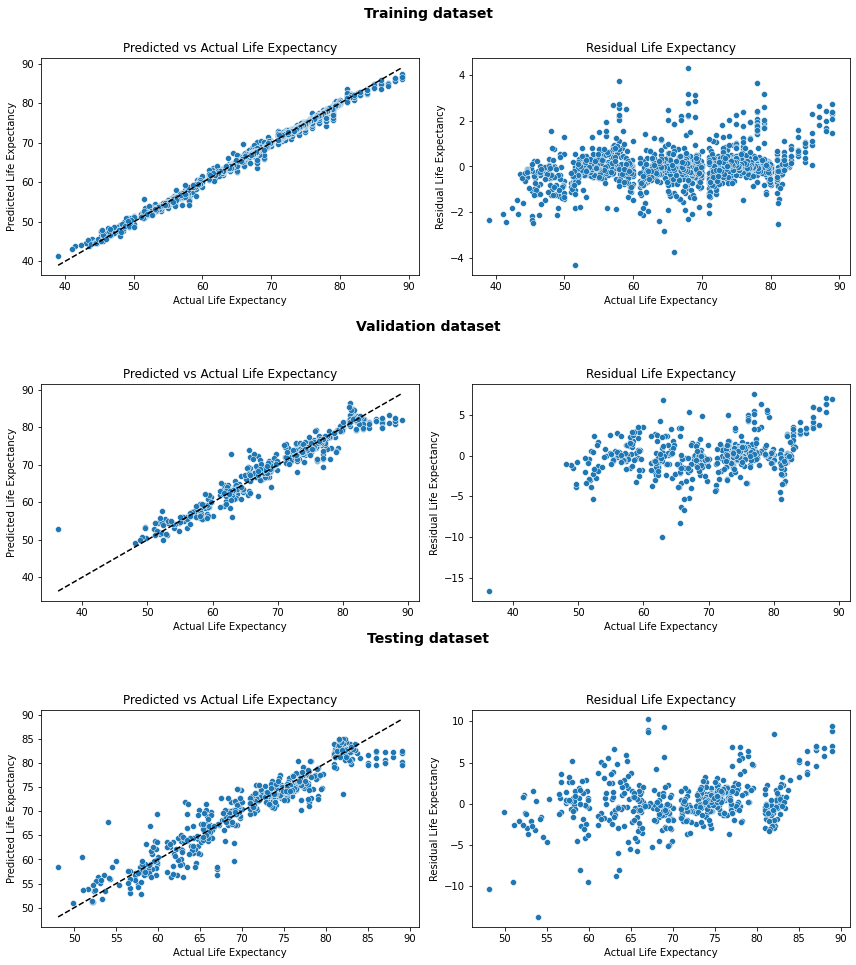

In [61]:
forest_model = nonlinear_fit(rf)

Gradient boosting regression

In [62]:
gb = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5)

               feature  importance
0                 Year    0.003696
1      Adult Mortality    0.160622
2              Alcohol    0.011741
3          Hepatitis B    0.000586
4             Measles     0.001004
..                 ...         ...
196      Country_Yemen    0.000000
197     Country_Zambia    0.000002
198   Country_Zimbabwe    0.000042
199   Status_Developed    0.000253
200  Status_Developing    0.000070

[201 rows x 2 columns]
The feature importances: the higher, the more important the feature.
Training set:
	RMSE loss:  0.6093345683472476
	R² score: 0.9937284359325038
Validation set:
	RMSE loss:  4.5556741682686175
	R² score: 0.942719829529786
Test set:
	RMSE loss:  6.545106107291236
	R² score: 0.906054097223353


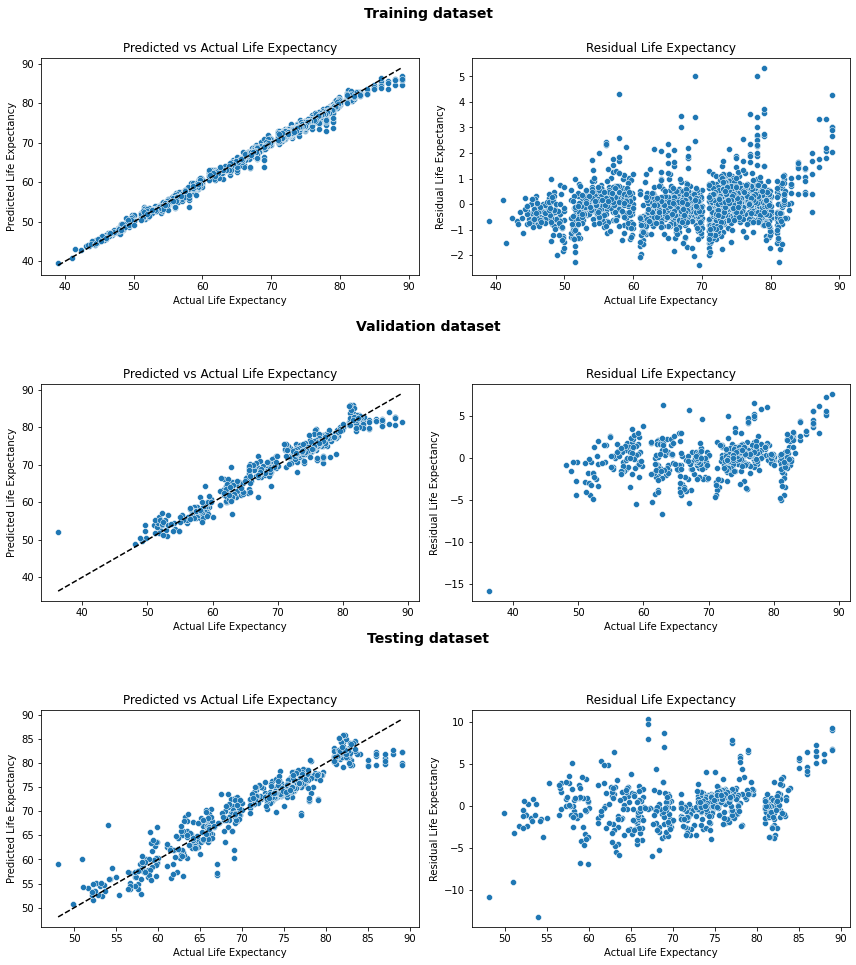

In [63]:
gradient_model = nonlinear_fit(gb)